# Import Modules

In [2]:
import matplotlib.pyplot as plt
import sklearn as sk
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib

In [3]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
lemmatizer=WordNetLemmatizer()

from nltk.corpus import sentiwordnet as swn
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

from nltk.corpus import wordnet as wn
nltk.download('sentiwordnet')

from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

from nltk.sentiment import SentimentAnalyzer
from nltk.sentiment.util import extract_unigram_feats, mark_negation

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package sentiwordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/sentiwordnet.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [4]:
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest,chi2 
from sklearn import svm 
from sklearn.naive_bayes import MultinomialNB

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer,TfidfTransformer
from sklearn.model_selection import train_test_split,KFold,GridSearchCV,cross_val_score,StratifiedKFold
from nltk.classify import NaiveBayesClassifier
from sklearn.metrics import classification_report, accuracy_score, make_scorer
from sklearn.ensemble import RandomForestClassifier 

In [6]:
!wget https://raw.githubusercontent.com/Dinesh-Adhithya-H/Natural-Language-Processing/main/Financial-Sentiment-Analysis/assignment1_training_data.txt
!wget https://raw.githubusercontent.com/Dinesh-Adhithya-H/Natural-Language-Processing/main/Financial-Sentiment-Analysis/assignment1_training_data_labels.txt

--2021-09-26 16:22:56--  https://raw.githubusercontent.com/Dinesh-Adhithya-H/Natural-Language-Processing/main/Financial-Sentiment-Analysis/assignment1_training_data.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 222914 (218K) [text/plain]
Saving to: ‘assignment1_training_data.txt’

assignment1_trainin 100%[===================>] 217.69K  --.-KB/s    in 0.02s   

2021-09-26 16:22:57 (8.73 MB/s) - ‘assignment1_training_data.txt’ saved [222914/222914]

--2021-09-26 16:22:57--  https://raw.githubusercontent.com/Dinesh-Adhithya-H/Natural-Language-Processing/main/Financial-Sentiment-Analysis/assignment1_training_data_labels.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.110.133, ...
Connecting t

# Text Preprocessing

In [7]:
train_labels=open("assignment1_training_data_labels.txt")
train_labels=train_labels.readlines()

for i in range(len(train_labels)):
  train_labels[i]=train_labels[i].rstrip("\n")

In [8]:
file=open("assignment1_training_data.txt","r+")
data=file.readlines()

In [9]:
for i in range(len(data)):
  data[i]=data[i].rstrip(".\n")

In [10]:
stop_words=set(stopwords.words('english')) 
def filter_stop_words(text):
  new_text=[]
  for sentence in text:
    new_sentence=""
    tokens=sentence.split(" ")
    for word in tokens:
      if word not in stop_words:
        new_sentence+=word+" "
    new_sentence.rstrip(" ")
    new_text.append(new_sentence)
  return new_text

In [11]:
filter_data=filter_stop_words(data)

In [12]:
all_the_words=[]
for i in filter_data:
  all_the_words.append(word_tokenize(i))
all_the_words=np.array(all_the_words)
len(np.unique(all_the_words))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  after removing the cwd from sys.path.


1807

In [13]:
def lemmatization(text):
  new_text=[]
  for sentence in text:
    new_sentence=""
    tokens=sentence.split(" ")
    for word in tokens:
        lemma_word=lemmatizer.lemmatize(word)
        if len(lemma_word)>2 and lemma_word.isnumeric()==False:
          new_sentence+=lemma_word+" "
    new_sentence.rstrip(" ")
    new_text.append(new_sentence)
  return new_text

In [14]:
filter_data1=lemmatization(filter_data)

In [15]:
all_the_words=[]
for i in filter_data1:
  all_the_words.append(word_tokenize(i))
all_the_words=np.array(all_the_words)
len(np.unique(all_the_words))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  after removing the cwd from sys.path.


1805

In [25]:
!wget https://raw.githubusercontent.com/Dinesh-Adhithya-H/Natural-Language-Processing/main/Financial-Sentiment-Analysis/assignment1_test_data.txt

--2021-09-26 16:25:34--  https://raw.githubusercontent.com/Dinesh-Adhithya-H/Natural-Language-Processing/main/Financial-Sentiment-Analysis/assignment1_test_data.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 55553 (54K) [text/plain]
Saving to: ‘assignment1_test_data.txt’

assignment1_test_da 100%[===================>]  54.25K  --.-KB/s    in 0.01s   

2021-09-26 16:25:34 (5.22 MB/s) - ‘assignment1_test_data.txt’ saved [55553/55553]



In [26]:
test_file=open("assignment1_test_data.txt")

In [27]:
test_file=test_file.readlines()

In [28]:
test_file=filter_stop_words(test_file)

In [29]:
test_file=lemmatization(test_file)

In [16]:
from wordcloud import WordCloud

In [17]:
class1="positive"

In [18]:
comment_words=""
for i in range(len(filter_data1)):
  if train_labels[i]==class1:
    for j in word_tokenize(filter_data1[i]):
      comment_words+=j+" "
comment_words.rstrip(" ")

"Merrill Lynch analyst Campbell Morgan upgraded recommendation PaperlinX neutral buy May Finnish steel maker Rautaruukki Oyj Ruukki said July 9.0 mln euro 14.1 mln contract supply install steel superstructure Partihallsforbindelsen bridge project Gothenburg western Sweden Finnish metal product company Componenta Oyj HEL CTH1V said today net loss narrowed EUR 500,000 USD 680,000 last quarter EUR 5.3 million period year earlier Sales climbed 19.2 pct 1.002 bln eur surpassing mln eur consensus figure The combined activity create value shareholder good employee customer Operating profit totalled EUR 7.0 loss EUR 4.0 second quarter The company make marketing sale investment initiated even efficient The company scheduled traffic measured revenue passenger kilometre RPK grew nearly passenger carried scheduled flight February Outotec net profit second quarter jumped 16.8 mln euro 23.1 mln 4.6 mln euro 6.3 mln year ago EBIT totalled EUR 14.4 compared loss EUR 0.3 corresponding period Finland na

In [19]:
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                min_font_size = 10).generate(comment_words)

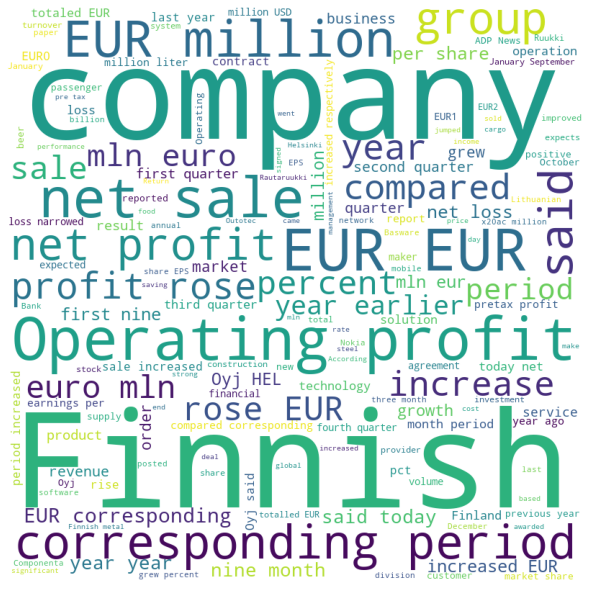

In [20]:
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

# Sentiment WordNet

In [ ]:
pos=neg=obj=count=0.0
postagging=[]
for i in filter_data1:
  list1=word_tokenize(i)
  postagging.append(nltk.pos_tag(list1))

In [ ]:
postagging[0]

[('Merrill', 'NNP'),
 ('Lynch', 'NNP'),
 ('analyst', 'NN'),
 ('Campbell', 'NNP'),
 ('Morgan', 'NNP'),
 ('upgraded', 'VBD'),
 ('recommendation', 'NN'),
 ('PaperlinX', 'NNP'),
 ('neutral', 'JJ'),
 ('buy', 'NN'),
 ('May', 'NNP')]

In [ ]:
def pos_to_wn(tag):
  if tag.startswith("J"):
    return wn.ADJ
  elif tag.startswith("N"):
    return wn.NOUN
  elif tag.startswith("R"):
    return wn.ADV
  elif tag.startswith("V"):
    return wn.VERB
  return None

In [ ]:
def get_sentiment(word,tag):
  wn_tag=pos_to_wn(tag)
  if wn_tag not in (wn.NOUN,wn.ADJ,wn.ADV):
    return []
  
  lemma=lemmatizer.lemmatize(word,pos=wn_tag)
  if not lemma:
    return []
  synsets=wn.synsets(word,pos=wn_tag)
  if not synsets:
    return []
  synset=synsets[0]
  swn_synset=swn.senti_synset(synset.name())

  return [synset.name(),swn_synset.pos_score(),swn_synset.neg_score(),swn_synset.obj_score()]

In [ ]:
get_sentiment(postagging[100][0][0],postagging[100][0][1])

['finland.n.01', 0.0, 0.0, 1.0]

In [ ]:
postagging[0][0]

('Merrill', 'NNP')

In [ ]:
pos=neg=obj=count=0
senti_score=[]

for i in postagging:
  senti_val=[get_sentiment(x,y) for (x,y) in i]
  for score in senti_val:
    try:
      pos+=score[1]
      neg+=score[2]
    except:
      continue
  senti_score.append([pos,neg])
  pos=neg=0

In [ ]:
senti_score=np.array(senti_score)

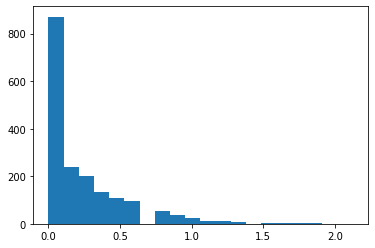

In [ ]:
plt.hist(senti_score[:,0],bins=20)
plt.show()

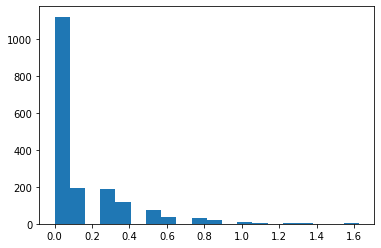

In [ ]:
plt.hist(senti_score[:,1],bins=20)
plt.show()

In [ ]:
train_labels[1:100];
colors = ['orange','blue','green']


In [ ]:
colors = ['orange','blue','green']

labels_plotter=[]
for i in train_labels:
  if i=="neutral":
    labels_plotter.append(colors[0])
  elif i=="positive":
    labels_plotter.append(colors[1])
  else:
    labels_plotter.append(colors[2])

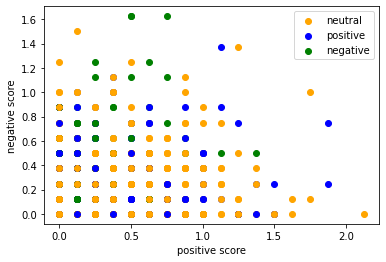

In [ ]:
for i in range(len(labels_plotter)):
  plt.scatter(senti_score[:,0][i],senti_score[:,1][i],color=labels_plotter[i])
#plt.legend()
plt.xlabel("positive score")
plt.ylabel("negative score")
plt.scatter(0.0,0.0,label="neutral",color="orange")
plt.scatter(1.0,0.5,label="positive",color="blue")
plt.scatter(0.5,1.625,label="negative",color="green")
plt.legend()
plt.show()

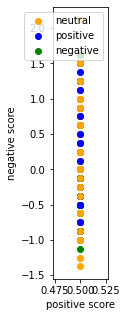

In [ ]:
plt.figure(figsize=(1,5))
colors = ['orange','blue','green']
for i in range(len(labels_plotter)):
  plt.scatter(0.5,senti_score[:,0][i]-senti_score[:,1][i],color=labels_plotter[i])
#plt.legend()
plt.xlabel("positive score")
plt.ylabel("negative score")
plt.scatter(0.5,0.0,label="neutral",color="orange")
plt.scatter(0.5,0.5,label="positive",color="blue")
plt.scatter(0.5,1.625,label="negative",color="green")
plt.legend()
plt.show()

In [ ]:
total_=0
for i in train_labels:
  if i=="neutral":
    total_+=1
total_

1113

In [ ]:
neg=pos=0
neg=np.searchsorted(np.sort(train_labels),"neutral")-1
pos=np.searchsorted(np.sort(train_labels),"positive")
np.sort(senti_score)[neg],np.sort(senti_score)[pos]

(array([0.125, 0.5  ]), array([0.25, 0.5 ]))

In [ ]:
sentiment=[]
for i in senti_score[:,0]-senti_score[:,1]:
  if i>=0.23:
    sentiment.append("positive")
  elif i<=-0.25:
    sentiment.append("negative")
  else:
    sentiment.append("neutral")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


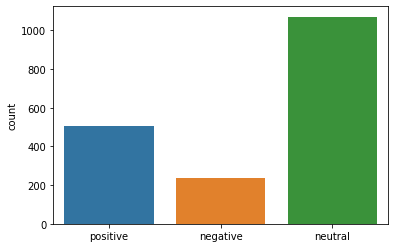

In [ ]:
sns.countplot(sentiment)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


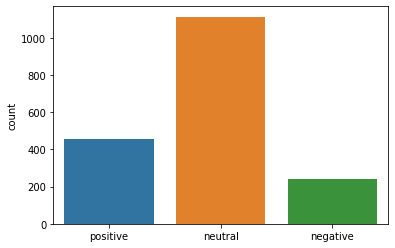

In [ ]:
sns.countplot(train_labels)

In [ ]:
def x(y):
  return y

In [ ]:
confusion_matrix(train_labels,sentiment)

array([[ 65, 154,  23],
       [ 95, 660, 358],
       [ 77, 256, 123]])

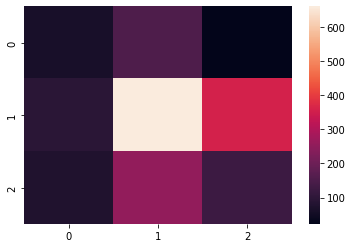

In [ ]:
sns.heatmap(confusion_matrix(train_labels,sentiment))
plt.show()

In [ ]:
print(classification_report(train_labels,sentiment))

              precision    recall  f1-score   support

    negative       0.27      0.27      0.27       242
     neutral       0.62      0.59      0.60      1113
    positive       0.24      0.27      0.26       456

    accuracy                           0.47      1811
   macro avg       0.38      0.38      0.38      1811
weighted avg       0.48      0.47      0.47      1811



# Logistic Regression

In [41]:
x_train,x_test,y_train,y_test=train_test_split(filter_data1,train_labels)

In [42]:
clf=LogisticRegression(class_weight='balanced') 
clf_parameters = {
        'clf__solver':('newton-cg','lbfgs','liblinear'),
        'clf__C':[1,0.1,0.01]
        }  

In [43]:
pipeline = Pipeline([
    ('vect', TfidfVectorizer(token_pattern=r'\b\w+\b')),       
    ('tfidf', TfidfTransformer(use_idf=True,smooth_idf=True)),     
    ('clf', clf),]) 
        
feature_parameters = {
    'vect__min_df': (2,3),
    'vect__ngram_range': ((1,1),(1, 2),(1,3),(2,3)),  # Unigrams, Bigrams or Trigrams
    }

In [44]:
parameters={**feature_parameters,**clf_parameters} 
cv = KFold(n_splits=10, shuffle=True, random_state=1)
grid = GridSearchCV(pipeline,parameters,scoring='f1_micro',cv=cv)          
grid.fit(filter_data1,train_labels)     
clf= grid.best_estimator_  
print('********* Best Set of Parameters ********* \n\n')
print(clf)
    
predicted = clf.predict(x_test)
predicted =list(predicted)

********* Best Set of Parameters ********* 


Pipeline(memory=None,
         steps=[('vect',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=2, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False, token_pattern='\...
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('clf',
                 LogisticRegression(C=1, class_weight='balanced', dual=False,
                             

In [45]:
x,y=filter_data1,train_labels
#Make our customer score
def classification_report_with_accuracy_score(y_true, y_pred):
    originalclass.extend(y_true)
    predictedclass.extend(y_pred)
    return accuracy_score(y_true, y_pred) # return accuracy score

#def average_classification_report(clf,x,y):

  # Variables for average classification report
originalclass = []
predictedclass = []

outer_cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)

# Non_nested parameter search and scoring

  # Nested CV with parameter optimization
nested_score = cross_val_score(clf, X=x, y=y, cv=outer_cv, scoring=make_scorer(classification_report_with_accuracy_score))

  # Average values in classification report for all folds in a K-fold Cross-validation  
print(classification_report(originalclass, predictedclass)) 

              precision    recall  f1-score   support

    negative       0.66      0.66      0.66       242
     neutral       0.89      0.94      0.91      1113
    positive       0.78      0.66      0.72       456

    accuracy                           0.83      1811
   macro avg       0.77      0.75      0.76      1811
weighted avg       0.83      0.83      0.83      1811



In [46]:
for i in range(len(predicted)):
  if predicted[i]!=y_test[i]:
    print(x_test[i])

first quarter Sacanfil net sale totalled EUR 50.0 operating profit EUR 4.7 
Neste Shipping likely remain Finnish oil sector transport significant emergency supply 
The growth net sale first half compared first half 
Thus method cut working cost fasten planning building process 
For net profit EUR million company paid dividend EUR 1.30 apiece 
Operating profit totalled EUR 7.0 loss EUR 4.0 second quarter 
The Group profit tax EUR 0,2 7,8 million 
Previously delivered custom solution Electronics making commercially available mobile terminal vendor well wireless operator 
Operating profit EUR 11.4 EUR 7.5 
The company net profit amounted 55.5 
Arvo Vuorenmaa Loviisa plant general manager said application new licence standard procedure quite confident approval granted 
Very recommendable Nokian according ADAC judgement latest summer tyre test German automobile association ADAC 
Operating profit totaled EUR 5.5 EUR -0.7 
With appointment Kaupthing Bank aim co-ordinate Capital Markets activi

In [37]:
d=open("output_file.csv","w")
for i in clf.predict(test_file):
  d.write(i+",")

In [38]:
c=open("output_file.csv","r")
c.readlines()

[]

# Decision Tree Classifier

In [ ]:
clf = DecisionTreeClassifier(random_state=40)
clf_parameters = {
        'clf__criterion':('gini', 'entropy'), 
        'clf__max_features':('auto', 'sqrt', 'log2'),
        'clf__ccp_alpha':(0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1),
        } 

In [ ]:
pipeline = Pipeline([
    ('vect', TfidfVectorizer(token_pattern=r'\b\w+\b')),
    ('tfidf', TfidfTransformer(use_idf=True,smooth_idf=True)),     
    ('clf', clf),]) 
        
feature_parameters = {
    'vect__min_df': (2,3),
    'vect__ngram_range': ((1,1),(1, 2),(1,3),(2,3)),  # Unigrams, Bigrams or Trigrams
    }

In [ ]:
parameters={**feature_parameters,**clf_parameters} 
cv = KFold(n_splits=10, shuffle=True, random_state=1)
grid = GridSearchCV(pipeline,parameters,scoring='f1_micro',cv=cv)          
grid.fit(filter_data1,train_labels)     
clf= grid.best_estimator_  
print('********* Best Set of Parameters ********* \n\n')
print(clf)
    
predicted = clf.predict(x_test)
predicted =list(predicted)

********* Best Set of Parameters ********* 


Pipeline(memory=None,
         steps=[('vect',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=3, ngram_range=(1, 2), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False, token_pattern='\...
                                  sublinear_tf=False, use_idf=True)),
                ('clf',
                 DecisionTreeClassifier(ccp_alpha=0.01, class_weight=None,
                                        criterion='entropy', max_depth=None,
                                        max

In [ ]:
x,y=filter_data1,train_labels
#Make our customer score
def classification_report_with_accuracy_score(y_true, y_pred):
    originalclass.extend(y_true)
    predictedclass.extend(y_pred)
    return accuracy_score(y_true, y_pred) # return accuracy score

#def average_classification_report(clf,x,y):

  # Variables for average classification report
originalclass = []
predictedclass = []

outer_cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)

# Non_nested parameter search and scoring

  # Nested CV with parameter optimization
nested_score = cross_val_score(clf, X=x, y=y, cv=outer_cv, scoring=make_scorer(classification_report_with_accuracy_score))

  # Average values in classification report for all folds in a K-fold Cross-validation  
print(classification_report(originalclass, predictedclass)) 

              precision    recall  f1-score   support

    negative       0.55      0.18      0.27       242
     neutral       0.80      0.88      0.84      1113
    positive       0.52      0.56      0.54       456

    accuracy                           0.71      1811
   macro avg       0.62      0.54      0.55      1811
weighted avg       0.69      0.71      0.69      1811



# Random Forest Classifier

In [ ]:
clf = RandomForestClassifier(class_weight='balanced', max_depth=10)
clf_parameters = {
                    'clf__criterion':('gini', 'entropy'), 
                    'clf__max_features':('auto', 'sqrt', 'log2'),   
                    'clf__n_estimators':(30,50,100,200),
                    'clf__max_depth':(10,20),
                    }    

In [ ]:
pipeline = Pipeline([
    ('vect', TfidfVectorizer(token_pattern=r'\b\w+\b')),
    ('tfidf', TfidfTransformer(use_idf=True,smooth_idf=True)),     
    ('clf', clf),]) 
        
feature_parameters = {
    'vect__min_df': (2,3),
    'vect__ngram_range': ((1,1),(1, 2),(1,3),(2,3)),  # Unigrams, Bigrams or Trigrams
    }

In [ ]:
parameters={**feature_parameters,**clf_parameters} 
cv = KFold(n_splits=10, shuffle=True, random_state=1)
grid = GridSearchCV(pipeline,parameters,scoring='f1_micro',cv=cv)          
grid.fit(filter_data1,train_labels)     
clf= grid.best_estimator_  
print('********* Best Set of Parameters ********* \n\n')
print(clf)
    
predicted = clf.predict(x_test)
predicted =list(predicted)

********* Best Set of Parameters ********* 


Pipeline(memory=None,
         steps=[('vect',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=3, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False, token_pattern='\...
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight='balanced',
                                        criterion='entropy', max_depth=20,
                                        max_features='auto',
                 

In [ ]:
x,y=filter_data1,train_labels
#Make our customer score
def classification_report_with_accuracy_score(y_true, y_pred):
    originalclass.extend(y_true)
    predictedclass.extend(y_pred)
    return accuracy_score(y_true, y_pred) # return accuracy score

#def average_classification_report(clf,x,y):

  # Variables for average classification report
originalclass = []
predictedclass = []

outer_cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)

# Non_nested parameter search and scoring

  # Nested CV with parameter optimization
nested_score = cross_val_score(clf, X=x, y=y, cv=outer_cv, scoring=make_scorer(classification_report_with_accuracy_score))

  # Average values in classification report for all folds in a K-fold Cross-validation  
print(classification_report(originalclass, predictedclass)) 

              precision    recall  f1-score   support

    negative       0.76      0.46      0.57       242
     neutral       0.85      0.96      0.90      1113
    positive       0.72      0.64      0.68       456

    accuracy                           0.81      1811
   macro avg       0.78      0.69      0.72      1811
weighted avg       0.80      0.81      0.80      1811



# Naive Bayes

In [ ]:
clf=MultinomialNB(alpha=0,fit_prior=True, class_prior=None)  
clf_parameters = {
        'clf__alpha':(0,1),
        }  

In [ ]:
pipeline = Pipeline([
    ('vect', TfidfVectorizer(token_pattern=r'\b\w+\b')),
    ('tfidf', TfidfTransformer(use_idf=True,smooth_idf=True)),     
    ('clf', clf),]) 
        
feature_parameters = {
    'vect__min_df': (2,3),
    'vect__ngram_range': ((1,1),(1, 2),(1,3),(2,3)),  # Unigrams, Bigrams or Trigrams
    }

In [ ]:
parameters={**feature_parameters,**clf_parameters} 
cv = KFold(n_splits=10, shuffle=True, random_state=1)
grid = GridSearchCV(pipeline,parameters,scoring='f1_micro',cv=cv)          
grid.fit(filter_data1,train_labels)     
clf= grid.best_estimator_  
print('********* Best Set of Parameters ********* \n\n')
print(clf)
    
predicted = clf.predict(x_test)
predicted =list(predicted)

/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:507: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:507: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:507: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:507: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:507: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
/usr/local/lib/python3.7/dist-packages/sklearn/nai

********* Best Set of Parameters ********* 


Pipeline(memory=None,
         steps=[('vect',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=3, ngram_range=(1, 3), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False, token_pattern='\\b\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
        

/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:507: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


In [ ]:
x,y=filter_data1,train_labels
#Make our customer score
def classification_report_with_accuracy_score(y_true, y_pred):
    originalclass.extend(y_true)
    predictedclass.extend(y_pred)
    return accuracy_score(y_true, y_pred) # return accuracy score

#def average_classification_report(clf,x,y):

  # Variables for average classification report
originalclass = []
predictedclass = []

outer_cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)

# Non_nested parameter search and scoring

  # Nested CV with parameter optimization
nested_score = cross_val_score(clf, X=x, y=y, cv=outer_cv, scoring=make_scorer(classification_report_with_accuracy_score))

  # Average values in classification report for all folds in a K-fold Cross-validation  
print(classification_report(originalclass, predictedclass)) 

/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:507: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:507: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:507: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:507: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:507: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
/usr/local/lib/python3.7/dist-packages/sklearn/nai

              precision    recall  f1-score   support

    negative       0.63      0.48      0.54       242
     neutral       0.86      0.92      0.89      1113
    positive       0.69      0.66      0.67       456

    accuracy                           0.79      1811
   macro avg       0.73      0.68      0.70      1811
weighted avg       0.78      0.79      0.79      1811



/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:507: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:507: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


# Support Vector Classifier

In [ ]:
clf = svm.LinearSVC(class_weight='balanced',max_iter=5000)  
clf_parameters = {
        'clf__C':(0.1,1,2,10,50,100),
        } 

In [ ]:
pipeline = Pipeline([
    ('vect', TfidfVectorizer(token_pattern=r'\b\w+\b')),
    ('tfidf', TfidfTransformer(use_idf=True,smooth_idf=True)),     
    ('clf', clf),]) 
        
feature_parameters = {
    'vect__min_df': (2,3),
    'vect__ngram_range': ((1,1),(1, 2),(1,3),(2,3)),  # Unigrams, Bigrams or Trigrams
    }

In [ ]:
parameters={**feature_parameters,**clf_parameters} 
cv = KFold(n_splits=10, shuffle=True, random_state=1)
grid = GridSearchCV(pipeline,parameters,scoring='f1_micro',cv=cv)          
grid.fit(filter_data1,train_labels)     
clf= grid.best_estimator_  
print('********* Best Set of Parameters ********* \n\n')
print(clf)
    
predicted = clf.predict(x_test)
predicted =list(predicted)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarn

********* Best Set of Parameters ********* 


Pipeline(memory=None,
         steps=[('vect',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=3, ngram_range=(1, 2), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False, token_pattern='\...',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
              

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [ ]:
x,y=filter_data1,train_labels
#Make our customer score
def classification_report_with_accuracy_score(y_true, y_pred):
    originalclass.extend(y_true)
    predictedclass.extend(y_pred)
    return accuracy_score(y_true, y_pred) # return accuracy score

#def average_classification_report(clf,x,y):

  # Variables for average classification report
originalclass = []
predictedclass = []

outer_cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)

# Non_nested parameter search and scoring

  # Nested CV with parameter optimization
nested_score = cross_val_score(clf, X=x, y=y, cv=outer_cv, scoring=make_scorer(classification_report_with_accuracy_score))

  # Average values in classification report for all folds in a K-fold Cross-validation  
print(classification_report(originalclass, predictedclass)) 

              precision    recall  f1-score   support

    negative       0.69      0.62      0.65       242
     neutral       0.89      0.92      0.91      1113
    positive       0.73      0.70      0.71       456

    accuracy                           0.83      1811
   macro avg       0.77      0.75      0.76      1811
weighted avg       0.82      0.83      0.82      1811



# *Sentiment Intensity Analyzer*

In [ ]:
vader_ = SentimentIntensityAnalyzer()

In [ ]:
def vader(text):
  scores_list=[]
  scores_val=[]
  for i in text:
    cur_score=vader_.polarity_scores(i)
    lab=["negative","positive","neutral"]
    scores=np.array([cur_score["neg"],cur_score["pos"],cur_score["neu"]])
    max=np.where(scores==np.max(scores))[0][0]
    #print(max)
    # if cur_score["neg"]>=0.:
    #   scores_list.append("negative")
    # elif cur_score["neu"]>=0.8:
    #   scores_list.append("neutral")
    # else:
    #   scores_list.append("positive")
    scores_list.append(lab[max])
    scores_val.append(scores)
  return scores_list,scores_val

In [ ]:
vader_.polarity_scores(filter_data1[10])

{'compound': 0.3182, 'neg': 0.0, 'neu': 0.796, 'pos': 0.204}

In [ ]:
sum(np.char.count(vader(filter_data1)[0],"negative")),sum(np.char.count(vader(filter_data1)[0],"positive"))

(3, 31)

In [ ]:
sum(np.char.count(train_labels,"negative")),sum(np.char.count(train_labels,"positive"))

(242, 456)

In [ ]:
set(vader(filter_data1)[0]),set(train_labels)

({'negative', 'neutral', 'positive'}, {'negative', 'neutral', 'positive'})

In [ ]:
confusion_matrix(train_labels,vader(filter_data1)[0])

array([[   2,  239,    1],
       [   1, 1100,   12],
       [   0,  438,   18]])

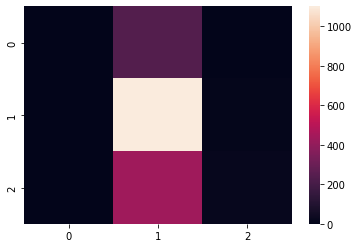

In [ ]:
sns.heatmap(confusion_matrix(train_labels,vader(filter_data1)[0]))
plt.show()

In [ ]:
print(classification_report(train_labels,vader(filter_data1)[0]))

              precision    recall  f1-score   support

    negative       0.67      0.01      0.02       242
     neutral       0.62      0.99      0.76      1113
    positive       0.58      0.04      0.07       456

    accuracy                           0.62      1811
   macro avg       0.62      0.35      0.28      1811
weighted avg       0.62      0.62      0.49      1811



In [ ]:
x=vader(filter_data1)[1]
y=vader(filter_data1)[0]

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(x)

In [ ]:
colors = ['orange','blue','green']

labels_plotter=[]
for i in train_labels:
  if i=="neutral":
    labels_plotter.append(colors[0])
  elif i=="positive":
    labels_plotter.append(colors[1])
  else:
    labels_plotter.append(colors[2])

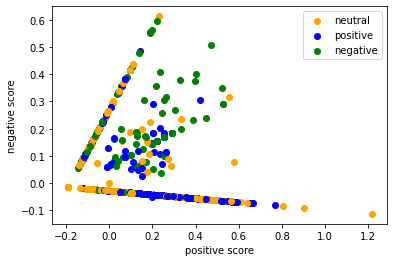

In [ ]:
for i in range(len(labels_plotter)):
  plt.scatter(pca_result[i][0],pca_result[i][1],color=labels_plotter[i])
#plt.legend()
plt.xlabel("positive score")
plt.ylabel("negative score")
plt.scatter(0.0,0.0,label="neutral",color="orange")
plt.scatter(0.2,-0.05,label="positive",color="blue")
plt.scatter(0.4,0.4,label="negative",color="green")
plt.legend()
plt.show()

In [ ]:
x=np.array(x)

In [ ]:
x=np.column_stack((senti_score, x))

In [ ]:
x

array([[0.875, 0.   , 0.   , 0.   , 1.   ],
       [0.   , 0.5  , 0.   , 0.   , 1.   ],
       [0.   , 0.   , 0.   , 0.   , 1.   ],
       ...,
       [0.375, 0.125, 0.   , 0.   , 1.   ],
       [0.875, 0.375, 0.   , 0.   , 1.   ],
       [0.25 , 0.   , 0.   , 0.   , 1.   ]])

In [ ]:
vader_dtc=DecisionTreeClassifier()
vader_dtc.fit(x,y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
print(classification_report(train_labels,vader_dtc.predict(x)))

              precision    recall  f1-score   support

    negative       0.67      0.01      0.02       242
     neutral       0.62      0.99      0.76      1113
    positive       0.58      0.04      0.07       456

    accuracy                           0.62      1811
   macro avg       0.62      0.35      0.28      1811
weighted avg       0.62      0.62      0.49      1811



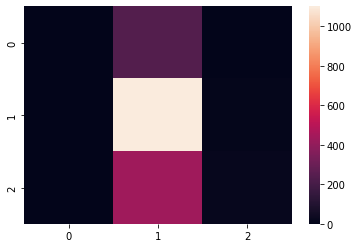

In [ ]:
sns.heatmap(confusion_matrix(train_labels,vader(filter_data1)[0]))

In [ ]:
vader_svm=svm.LinearSVC()
vader_svm.fit(x,y)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [ ]:
print(classification_report(train_labels,vader_svm.predict(x)))

              precision    recall  f1-score   support

    negative       0.00      0.00      0.00       242
     neutral       0.62      0.99      0.76      1113
    positive       0.61      0.03      0.06       456

    accuracy                           0.62      1811
   macro avg       0.41      0.34      0.27      1811
weighted avg       0.53      0.62      0.48      1811



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


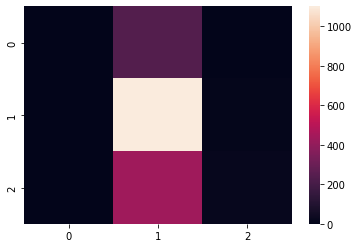

In [ ]:
sns.heatmap(confusion_matrix(train_labels,vader(filter_data1)[0]))

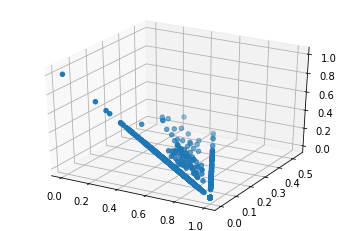

In [ ]:
from mpl_toolkits import mplot3d
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(x[:,2],x[:,0],x[:,1])

# Sentiment Analyzer

In [ ]:
analyzer = SentimentAnalyzer()
words=[]
for i in filter_data1:
  words.extend(i.split(" "))
vocabulary = analyzer.all_words(words)
unigram_features = analyzer.unigram_word_feats(words)
analyzer.add_feat_extractor(extract_unigram_feats, unigrams=unigram_features)
x_train1=analyzer.apply_features(filter_data1)
trainer = NaiveBayesClassifier.train
classifier = analyzer.train(trainer, list(zip(x_train1, y_train)))
analyzer.evaluate(list(zip(x_train1,train_labels)))

Training classifier
Evaluating NaiveBayesClassifier results...


{'Accuracy': 0.6145775814467145,
 'F-measure [negative]': None,
 'F-measure [neutral]': 0.7612859097127223,
 'F-measure [positive]': None,
 'Precision [negative]': None,
 'Precision [neutral]': 0.6145775814467145,
 'Precision [positive]': None,
 'Recall [negative]': 0.0,
 'Recall [neutral]': 1.0,
 'Recall [positive]': 0.0}

# Path Distance Approach from wordnet

In [ ]:
from nltk.corpus import wordnet as wn
syn1=wn.synsets(lemmatizer.lemmatize("good"))
syn2=wn.synsets(lemmatizer.lemmatize("positive"))

In [ ]:
print(wn.lch_similarity(syn1[4],syn2[2]))

None


In [ ]:
# Approach doesnt lead to any result